In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
def resimleri_kaydet(x,y,siniflar,dosya_yol):
    for k,v in siniflar.items():
        sinif_yol = os.path.join(dosya_yol, v)
        os.mkdir(sinif_yol)
        resimler = x[y[:,0] == k]
        for i,resim in enumerate(resimler):
            plt.imsave(sinif_yol +"\\"+ str(i)+".png",resim)   

In [3]:
def grafik_ciz(history,suptitle):
    epoklar = range(1,len(history["loss"])+1)
    
    fig,axx = plt.subplots(1,2,figsize=(18,6))
    
    axx[0].plot(epoklar,history["loss"],label="Training Loss")
    axx[0].plot(epoklar,history["val_loss"],label="Validation Loss")
    axx[0].set_title("Loss Karşılaştırması")
    axx[0].set_xlabel("Epoklar")
    axx[0].set_ylabel("Loss Değerleri")
    axx[0].legend()
  
    axx[1].plot(epoklar,history["acc"],label="Training Accuracy")
    axx[1].plot(epoklar,history["val_acc"],label="Validation Accuracy")
    axx[1].set_title("Accuracy Karşılaştırması")
    axx[1].set_xlabel("Epoklar")
    axx[1].set_ylabel("Accuracy Değerleri")
    axx[1].legend()
    
    fig.suptitle(suptitle,fontsize=15,color="darkblue")

    plt.show()

In [4]:
def grafik_ciz2(historyList,aciklamalar):
    epoklar = range(1,len(historyList[0]["loss"])+1)
    
    fig,axx = plt.subplots(1,2,figsize=(18,6))
    
    colors = ["red","blue","green"]
    
    for i,history in enumerate(historyList):
        axx[0].plot(epoklar,history["loss"],label="Training " + aciklamalar[i],linestyle="--",color=colors[i])
        axx[0].plot(epoklar,history["val_loss"],label="Validation " + aciklamalar[i],color=colors[i],alpha=0.8)
        
    axx[0].set_title("Loss Karşılaştırması")
    axx[0].set_xlabel("Epoklar")
    axx[0].set_ylabel("Loss Değerleri")
    axx[0].legend()
  
    for i,history in enumerate(historyList):
        axx[1].plot(epoklar,history["acc"],label="Training " + aciklamalar[i],linestyle="--",color=colors[i])
        axx[1].plot(epoklar,history["val_acc"],label="Validation " + aciklamalar[i],color=colors[i],alpha=0.8)
    axx[1].set_title("Accuracy Karşılaştırması")
    axx[1].set_xlabel("Epoklar")
    axx[1].set_ylabel("Accuracy Değerleri")
    axx[1].legend()
    
    fig.suptitle("-".join(aciklamalar) + " Karşılaştırılması",fontsize=15,color="darkblue")

    plt.show()

In [5]:
def model_olustur(dropout=False):
    model = models.Sequential()
    model.add(layers.Conv2D(32,(3,3),padding="same",activation="relu",
                            input_shape=(genislik,uzunluk,kanal_sayisi)))
    model.add(layers.Conv2D(32,(3,3),padding="same",activation="relu"))
    model.add(layers.MaxPooling2D()) #16x16x3
    model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(layers.Conv2D(64,(3,3),padding="same",activation="relu"))
    model.add(layers.MaxPooling2D()) #8x8x3
    model.add(layers.Conv2D(128,(3,3),padding="same",activation="relu"))
    model.add(layers.Conv2D(128,(3,3),padding="same",activation="relu"))
    model.add(layers.MaxPooling2D()) #4x4x3
    
    model.add(layers.Flatten())
    if(dropout):
        model.add(layers.Dropout(0.5))
    model.add(layers.Dense(256,activation="relu"))
    model.add(layers.Dense(sinif_sayisi,activation="softmax"))
    
    model.compile(optimizer=optimizers.Adam(lr=0.0001),
                  loss="categorical_crossentropy",metrics=["acc"])
    model.summary()
    
    return model

In [6]:
def generator_olustur(train_dir,test_dir,augmentation=False):
    if(augmentation):
        train_datagen = image.ImageDataGenerator(rescale=1./255,
        rotation_range=30,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.15,
        horizontal_flip=True)
    else:
        train_datagen = image.ImageDataGenerator(rescale=1./255)
    
    test_datagen = image.ImageDataGenerator(rescale=1/255.)
    
    train_gen = train_datagen.flow_from_directory(train_dir,target_size=(genislik,uzunluk),
                                              class_mode="categorical",batch_size=batch_size)
    test_gen = test_datagen.flow_from_directory(test_dir,target_size=(genislik,uzunluk),
                                              class_mode="categorical",batch_size=batch_size)
    
    return train_gen,test_gen

In [7]:
(x_train,y_train),(x_test,y_test) = cifar100.load_data()

In [8]:
siniflarim = dict({10:"bowl",24:"cockroach",49:"mountain",55:"otter",79:"spider",89:"tractor"})

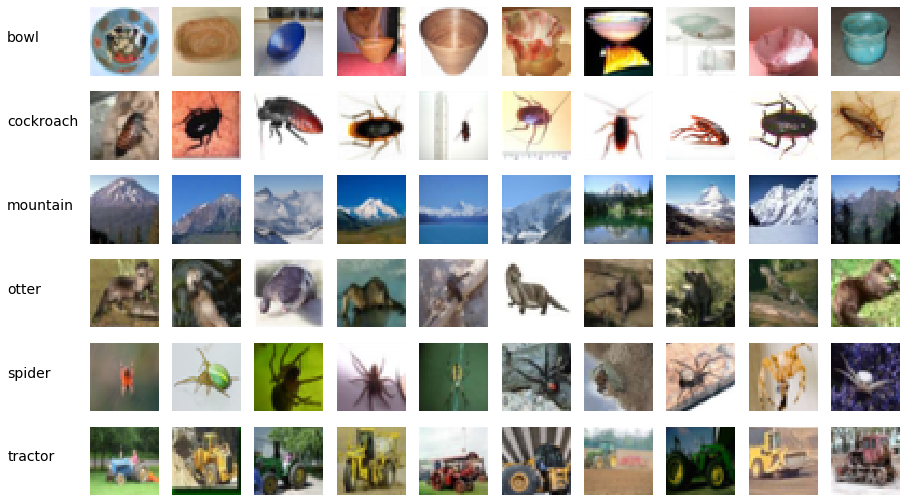

In [9]:
fig,ax = plt.subplots(6,11,figsize=(16,9))

labels = list(siniflarim.keys())

for i in range(6):
    resimler = x_train[y_train[:,0] == labels[i]]
    ax[i,0].axis("off")
    ax[i,0].text(0,0.5,siniflarim[labels[i]],fontdict={"size":14})
    for j in range(1,11):
        ax[i,j].axis("off")
        ax[i,j].imshow(resimler[j])
        
plt.show()

In [10]:
genislik = x_train.shape[1]
uzunluk = x_train.shape[2]
kanal_sayisi = x_train.shape[3]
batch_size = 50
sinif_sayisi = len(siniflarim)
epochs = 75

In [11]:
kucuk_veriseti_yolu = "kucukcifar100"

os.mkdir(kucuk_veriseti_yolu)

train_dir = os.path.join(kucuk_veriseti_yolu, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(kucuk_veriseti_yolu, 'test')
os.mkdir(test_dir)

resimleri_kaydet(x_train,y_train,siniflarim,train_dir)
resimleri_kaydet(x_test,y_test,siniflarim,test_dir)

In [12]:
train_gen,test_gen = generator_olustur(train_dir,test_dir)

Found 3000 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [13]:
model = model_olustur()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 128)        

In [14]:
historyNormal = model.fit_generator(train_gen,steps_per_epoch=train_gen.samples//batch_size,
                              epochs=epochs,validation_data=test_gen,validation_steps=test_gen.samples//batch_size)

Epoch 1/75
60/60 [==============================] - 3s 47ms/step - loss: 1.6643 - acc: 0.2853 - val_loss: 1.4607 - val_acc: 0.3500
Epoch 2/75
60/60 [==============================] - 1s 21ms/step - loss: 1.3225 - acc: 0.4673 - val_loss: 1.2374 - val_acc: 0.5133
Epoch 3/75
60/60 [==============================] - 1s 22ms/step - loss: 1.1962 - acc: 0.5427 - val_loss: 1.0082 - val_acc: 0.5500
Epoch 4/75
60/60 [==============================] - 1s 21ms/step - loss: 1.1096 - acc: 0.5770 - val_loss: 0.9758 - val_acc: 0.5650
Epoch 5/75
60/60 [==============================] - 1s 21ms/step - loss: 1.0291 - acc: 0.6060 - val_loss: 1.0598 - val_acc: 0.5933
Epoch 6/75
60/60 [==============================] - 1s 21ms/step - loss: 0.9343 - acc: 0.6557 - val_loss: 0.9339 - val_acc: 0.6200
Epoch 7/75
60/60 [==============================] - 1s 21ms/step - loss: 0.8896 - acc: 0.6610 - val_loss: 1.0031 - val_acc: 0.6450
Epoch 8/75
60/60 [==============================] - 1s 21ms/step - loss: 0.8472 - a

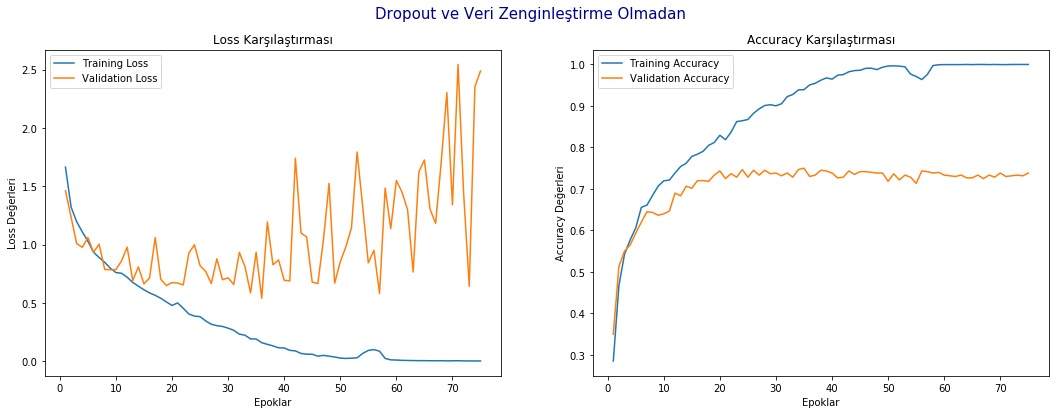

In [15]:
grafik_ciz(historyNormal.history,"Dropout ve Veri Zenginleştirme Olmadan")

<b>Dropoutlu</b>

In [16]:
model = model_olustur(dropout=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)        

In [17]:
historyDroplu = model.fit_generator(train_gen,steps_per_epoch=train_gen.samples//batch_size,
                              epochs=epochs,validation_data=test_gen,validation_steps=test_gen.samples//batch_size)

Epoch 1/75
60/60 [==============================] - 1s 24ms/step - loss: 1.7315 - acc: 0.2423 - val_loss: 1.5784 - val_acc: 0.3733
Epoch 2/75
60/60 [==============================] - 1s 23ms/step - loss: 1.4154 - acc: 0.4243 - val_loss: 1.2719 - val_acc: 0.4750
Epoch 3/75
60/60 [==============================] - 1s 21ms/step - loss: 1.2756 - acc: 0.4823 - val_loss: 1.1865 - val_acc: 0.5383
Epoch 4/75
60/60 [==============================] - 1s 21ms/step - loss: 1.1760 - acc: 0.5377 - val_loss: 1.0406 - val_acc: 0.5417
Epoch 5/75
60/60 [==============================] - 1s 22ms/step - loss: 1.0992 - acc: 0.5627 - val_loss: 0.9977 - val_acc: 0.5917
Epoch 6/75
60/60 [==============================] - 1s 21ms/step - loss: 1.0446 - acc: 0.5853 - val_loss: 1.0642 - val_acc: 0.5967
Epoch 7/75
60/60 [==============================] - 1s 21ms/step - loss: 0.9889 - acc: 0.6210 - val_loss: 0.7654 - val_acc: 0.6433
Epoch 8/75
60/60 [==============================] - 1s 22ms/step - loss: 0.9402 - a

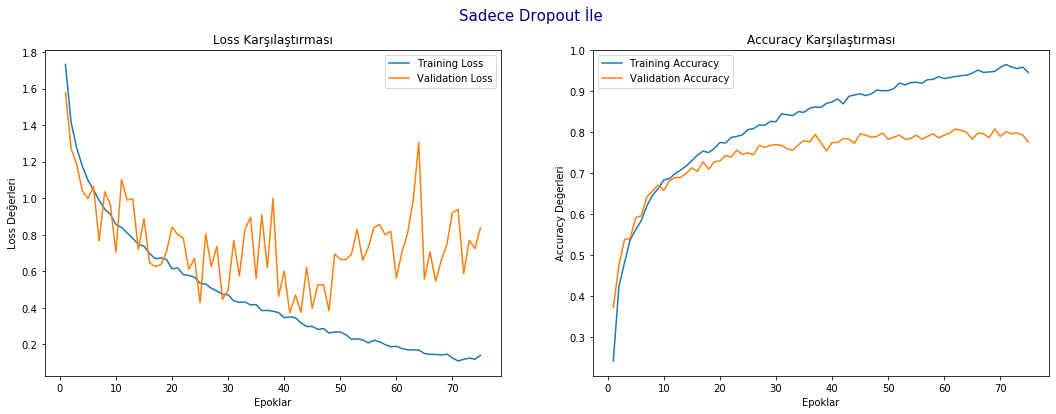

In [18]:
grafik_ciz(historyDroplu.history,"Sadece Dropout İle")

<b>Veri Zenginleştirme</b>

In [19]:
model = model_olustur()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 128)        

In [20]:
train_gen,test_gen = generator_olustur(train_dir,test_dir,augmentation=True)

Found 3000 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [21]:
historyAug = model.fit_generator(train_gen,steps_per_epoch=train_gen.samples//batch_size,
                              epochs=epochs,validation_data=test_gen,validation_steps=test_gen.samples//batch_size)

Epoch 1/75
60/60 [==============================] - 3s 44ms/step - loss: 1.6894 - acc: 0.2570 - val_loss: 1.3762 - val_acc: 0.4200
Epoch 2/75
60/60 [==============================] - 3s 43ms/step - loss: 1.4085 - acc: 0.4243 - val_loss: 1.3459 - val_acc: 0.4867
Epoch 3/75
60/60 [==============================] - 3s 43ms/step - loss: 1.3181 - acc: 0.4723 - val_loss: 1.0901 - val_acc: 0.5333
Epoch 4/75
60/60 [==============================] - 3s 43ms/step - loss: 1.2371 - acc: 0.5047 - val_loss: 1.2311 - val_acc: 0.5450
Epoch 5/75
60/60 [==============================] - 3s 43ms/step - loss: 1.1765 - acc: 0.5370 - val_loss: 1.1976 - val_acc: 0.5783
Epoch 6/75
60/60 [==============================] - 3s 43ms/step - loss: 1.1100 - acc: 0.5637 - val_loss: 0.8894 - val_acc: 0.6250
Epoch 7/75
60/60 [==============================] - 3s 43ms/step - loss: 1.0786 - acc: 0.5803 - val_loss: 1.1147 - val_acc: 0.6033
Epoch 8/75
60/60 [==============================] - 3s 44ms/step - loss: 1.0480 - a

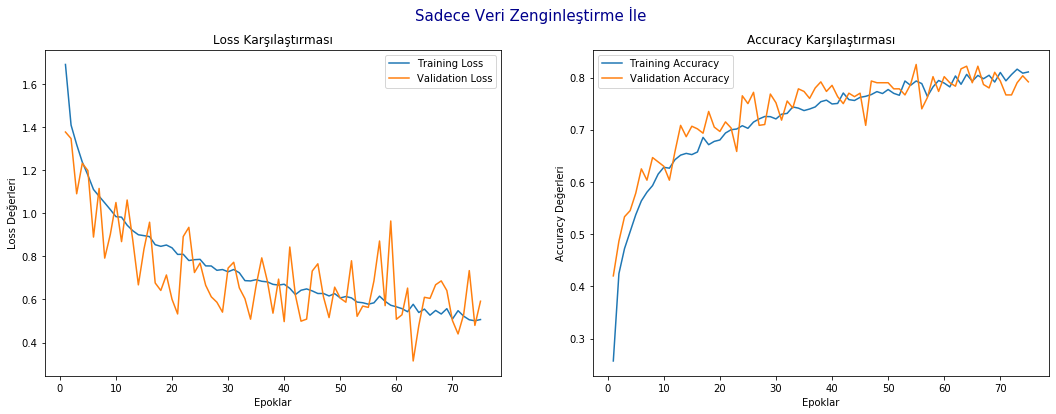

In [22]:
grafik_ciz(historyAug.history,"Sadece Veri Zenginleştirme İle")

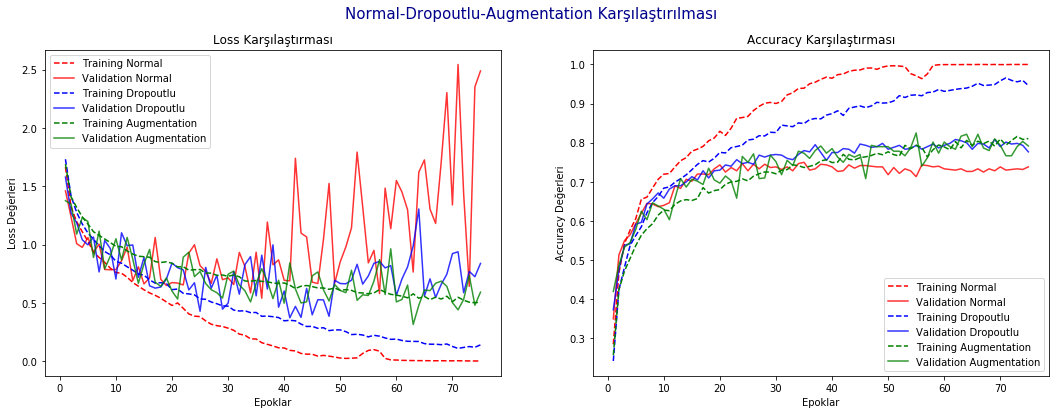

In [23]:
hList = [historyNormal.history,historyDroplu.history,historyAug.history]
hAciklamalar = ["Normal","Dropoutlu","Augmentation"]
grafik_ciz2(hList,hAciklamalar)

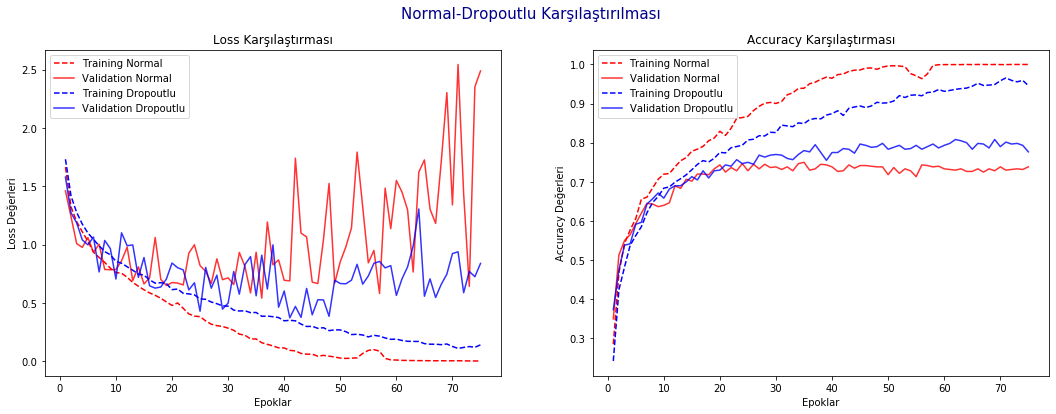

In [24]:
hList = [historyNormal.history,historyDroplu.history]
hAciklamalar = ["Normal","Dropoutlu",]
grafik_ciz2(hList,hAciklamalar)

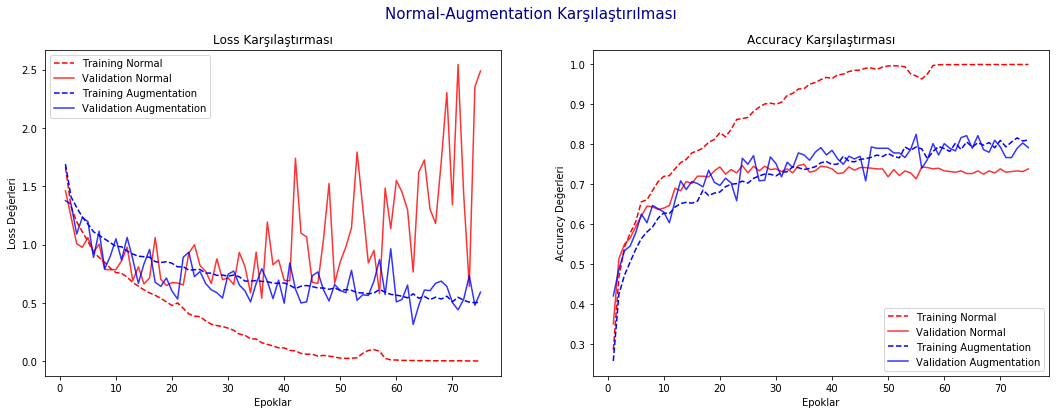

In [25]:
hList = [historyNormal.history,historyAug.history]
hAciklamalar = ["Normal","Augmentation"]
grafik_ciz2(hList,hAciklamalar)

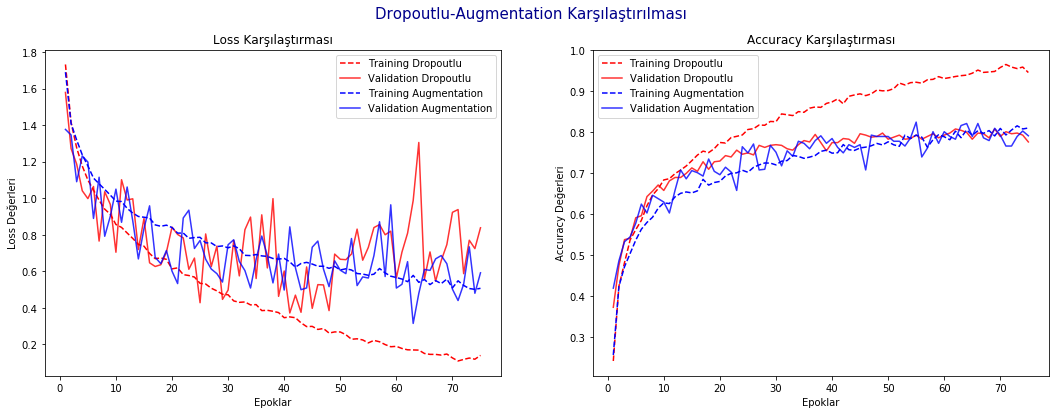

In [26]:
hList = [historyDroplu.history,historyAug.history]
hAciklamalar = ["Dropoutlu","Augmentation"]
grafik_ciz2(hList,hAciklamalar)

In [27]:
accMaxTrain = [np.max(historyNormal.history["acc"]),
          np.max(historyDroplu.history["acc"]),
          np.max(historyAug.history["acc"])]

accMaxVal = [np.max(historyNormal.history["val_acc"]),
          np.max(historyDroplu.history["val_acc"]),
          np.max(historyAug.history["val_acc"])]

x = np.arange(len(accMaxTrain))

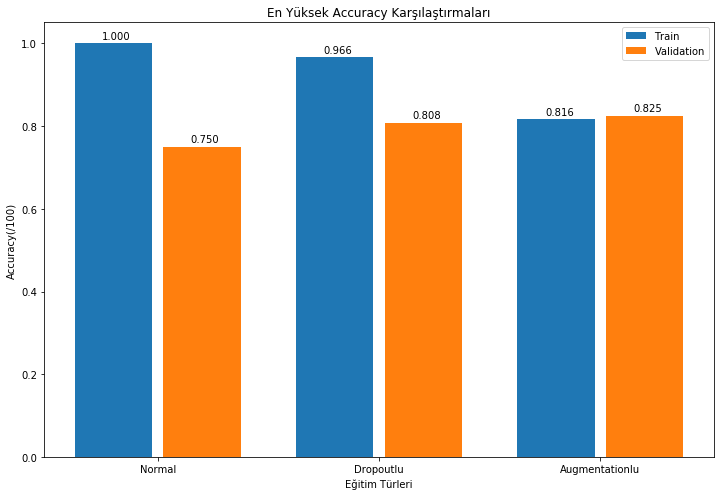

In [28]:
plt.figure(figsize=(12,8))

a = x-0.2
b = x+0.2
plt.bar(a,accMaxTrain,width=0.35)
plt.bar(b,accMaxVal,width=0.35)

plt.xticks(x,["Normal","Dropoutlu","Augmentationlu"])
plt.xlabel("Eğitim Türleri")
plt.ylabel("Accuracy(/100)")
plt.title("En Yüksek Accuracy Karşılaştırmaları")

plt.legend(["Train","Validation"])

for i in range(len(x)):
    plt.text(a[i]-0.05,accMaxTrain[i]+0.01,str("{:.3f}".format(accMaxTrain[i])))
    plt.text(b[i]-0.05,accMaxVal[i]+0.01,str("{:.3f}".format(accMaxVal[i])))
    
plt.show()

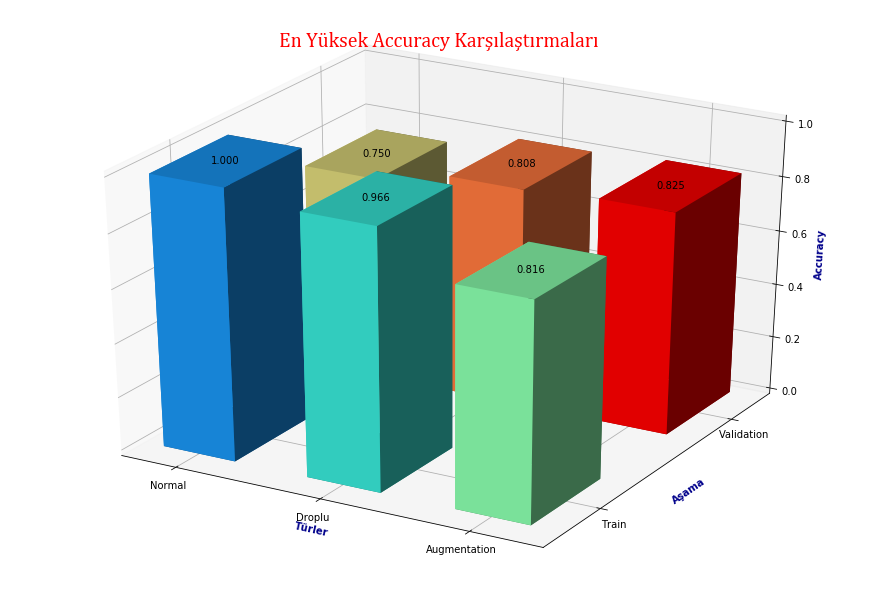

In [29]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

z = list()
z.append(accMaxTrain)
z.append(accMaxVal)

acc = np.array(z,dtype=np.float)
sekil = plt.figure(figsize=(12,8))
ax = Axes3D(sekil)

xlabels = np.array(['Normal','Droplu','Augmentation'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['Train','Validation'])
ypos = np.arange(ylabels.shape[0])
a,b = np.meshgrid(xpos,ypos,copy=False)
zpos = acc
zpos = zpos.ravel()

dx=0.5;dy=0.5;dz=zpos

ax.w_xaxis.set_ticks(xpos+0.2)
ax.w_xaxis.set_ticklabels(xlabels)
ax.w_yaxis.set_ticks(ypos+0.3)
ax.w_yaxis.set_ticklabels(ylabels)

ax.set_zlim(0,1)

ax.xaxis.set_label_text("Türler",fontweight="bold",color="darkblue")
ax.yaxis.set_label_text("Aşama",fontweight="bold",color="darkblue")
ax.zaxis.set_label_text("Accuracy",fontweight="bold",color="darkblue")

for i in xpos:
    for j in ypos:
        ax.text3D(i+0.2,j+0.2,acc[j,i],str("{:.3f}".format(acc[j,i])))
    
values = np.linspace(0.2,1.,a.ravel().shape[0])
renkler = cm.rainbow(values)
ax.bar3d(a.ravel(),b.ravel(),dz*0,dx,dy,dz,color=renkler)
plt.title("En Yüksek Accuracy Karşılaştırmaları",fontsize=20,fontname="Cambria",color="red")
plt.show()